# PCA Image Dimension Reduction and Recunstruction
Demonstrate the effekt of $k$ and Total Explained Variance on the MNIST and Fashion-MNIST dataset.
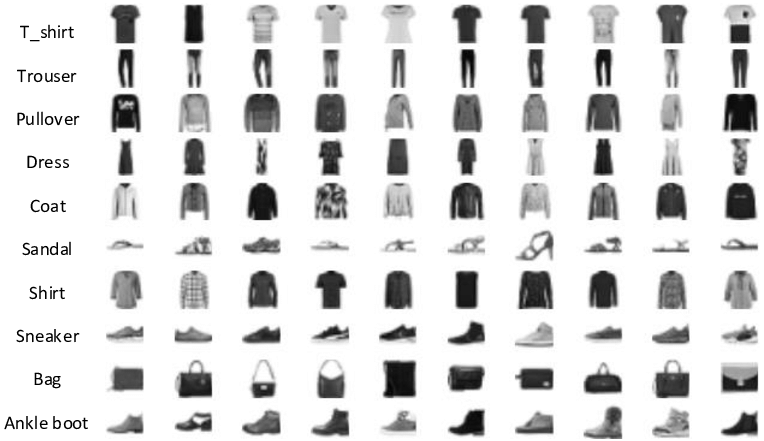

## Import needed packages

In [1]:
import torchvision
from matplotlib import pyplot as plt
import copy 
import numpy as np
import dask.array as da
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Download the Dataset

In [32]:
ds = torchvision.datasets.FashionMNIST('./ds_root',download=True)

print(f"Shape of the dataset: {ds.data.shape}")

Shape of the dataset: torch.Size([60000, 28, 28])


## Reshape (flatten) and scale the dataset

In [47]:
x_flattend = np.reshape(ds.data,(len(ds.data),-1))
#x_flattend = np.asarray(x_flattend)

# we fit a standard scaler and save it for inverse transformation later
scaler = StandardScaler().fit(x_flattend)
x_scaled = scaler.transform(x_flattend)

print(f"Shape of the dataset: {x_scaled.shape}")
print(f"Min and Max values of the original datset: min = {x_flattend.min()} / max = {x_flattend.max()}")
print(f"Min and Max values of the scaled datset: min = {x_scaled.min()} / max = {x_scaled.max()}")

Shape of the dataset: (60000, 784)
Min and Max values of the original datset: min = 0 / max = 255
Min and Max values of the scaled datset: min = -2.410065222002384 / max = 185.47759551478546


## Define some helper functions

### Convert flattend array to grayscale image

In [37]:
def getGrayImage(x,scaler,shape=[28,28],invert=True):
  img = x.reshape(1, -1)
  img = scaler.inverse_transform(img)
  img = img.reshape(shape)
  img = 255 - img if invert else img
  return img

### Plot Original image and recunstrutions

In [38]:
def plotSampleReconstrutions(sampleID=0):
  fig = plt.figure(figsize=(30., 4.))
  grid = ImageGrid(fig, 111, nrows_ncols=(1, 1 + len(pcas)),axes_pad=0.1)

  grid[0].imshow(getGrayImage(x_scaled[sampleID],scaler),cmap='gray', vmin=0, vmax=255)
  grid[0].set_title('Original')

  for i in range(len(pcas)):
    grid[i+1].imshow(getGrayImage(pcas[i]['zInverse'][sampleID],scaler),cmap='gray', vmin=0, vmax=255)
    grid[i+1].set_title(f"Recunstrution for $k={pcas[i]['k']}$\nExplained Variance = ${pcas[i]['explainedVariance']}$")
  plt.show()


## Calculate the PCA for different $k$'s and store the image recunstructions

In [39]:
# define the number of components
ks = [2,20,100,200,300,500]

# list to store the pca results
pcas = []

# perform the pca and store the explained variance, k and the inverse transform
for k in tqdm(ks):
  pca = PCA(n_components=k).fit(x_scaled)
  z = pca.transform(x_scaled)
  z_inverse = pca.inverse_transform(z)
  pcas.append({
      'explainedVariance': round(pca.explained_variance_ratio_.sum(),2),
      'pca': copy.deepcopy(pca),
      'zInverse': copy.deepcopy(z_inverse),
      'k':k
  })

100%|██████████| 6/6 [01:42<00:00, 17.05s/it]


## Plot the influence of k for the Total Explained Variance

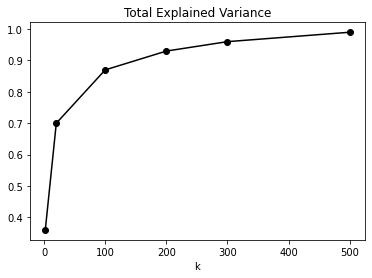

In [45]:
explainedVariance = [p['explainedVariance'] for p in pcas]
ks = [p['k'] for p in pcas]

plt.plot(ks,explainedVariance,'o-k')
plt.title("Total Explained Variance")
plt.xlabel("k");

## Now finaly plot the original image and the recunstructions
*Hint: You can use the slider to show a different sample of the dataset*

In [46]:
interact(plotSampleReconstrutions,sampleID=(0,100));

interactive(children=(IntSlider(value=0, description='sampleID'), Output()), _dom_classes=('widget-interact',)…